In [2]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 21.6MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=b7e55480c857057fe0d779571009f639743f6d32e6723045ce1feaeda647d353
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=8100eddc2408dbddf7a353bc2bae5b1513aaa7fe1cc3de669268cda20a07befe
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [3]:
import pickle
import cv2
#import matplotlib.pyplot as plt
import cvlib as cv
#from cvlib.object_detection import draw_bbox
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import  matplotlib.pyplot as  plt



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ls '/content/drive/MyDrive/MTP /'

 11-4-20/   datasets/   mtp/  'UCSD '/


In [6]:
labels = [line.rstrip('\n') for line in open('/content/drive/MyDrive/MTP /UCSD /labels.txt', 'r')]
vectorizer = CountVectorizer()
x1= vectorizer.fit(labels)
x2=vectorizer.transform(labels).toarray()
def getVector(labels):
    t=vectorizer.transform(set(labels)).toarray().sum(axis=0)
    return t


In [8]:
path= '/content/drive/MyDrive/MTP /UCSD /Train/Train001/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [9]:
%%time
frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
#     value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
CPU times: user 10min 40s, sys: 2.93 s, total: 10min 43s
Wall time: 8min 15s


In [10]:
label_arr=np.array(label_arr)
updated_arr=[]
for k in range(0,label_arr.shape[0]-30+1):
    x=np.average(label_arr[k:30+k,:],axis=0)
    updated_arr.append(x)
    

In [11]:
label_arr.shape

(200, 92)

In [12]:
updated_arr=np.array(updated_arr)

In [13]:
X_train = np.array(updated_arr)
print("Model is Training.......")
gmm= GaussianMixture(20) 
gmm.fit(X_train)

Model is Training.......


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=20, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Test

In [14]:
path= '/content/drive/MyDrive/MTP /UCSD /Test/Test001/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [15]:
%%time
frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
#     value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
CPU times: user 10min 43s, sys: 610 ms, total: 10min 44s
Wall time: 6min 20s


In [16]:
label_arr=np.array(label_arr)
updated_arr=[]
for k in range(0,label_arr.shape[0]-30+1):
    x=np.average(label_arr[k:30+k,:],axis=0)
    updated_arr.append(gmm.score([x]))

In [17]:
updated_arr=np.array(updated_arr)
updated_arr.shape

(171,)

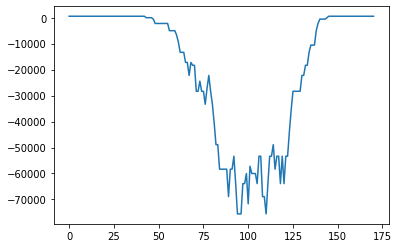

In [18]:
plt.plot(updated_arr)

In [27]:
y_test =[]
for i in range(1,172):
    if i in range(75,152):  # specify in the data set 1 for anomaly,0 for normal
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
mu  = np.mean(updated_arr)
sigma= np.var(updated_arr)
z_score = updated_arr-mu / sigma

In [29]:
th = -30000   #threshold 
y_pred= (z_score <th)*1

Area under the Receiver Operating Characteristic curve: 0.7987012987012987


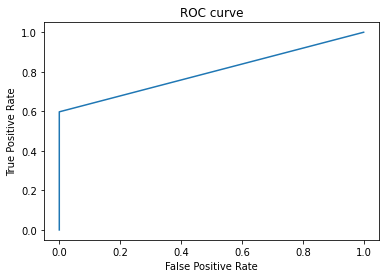

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred))
    


In [ ]:
%%time
img=cv2.imread(list_img[0])
bbox, label, conf = cv.detect_common_objects(img,enable_gpu=True)

CPU times: user 2.34 s, sys: 16 ms, total: 2.36 s
Wall time: 1.3 s


In [ ]:
X_test = np.array(label_arr)

NameError: ignored

Test

In [ ]:
path= '/content/drive/MyDrive/MTP /UCSD /Test/Test001/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [ ]:
#frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
   # value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
